In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('/content/data_needed_for_modeling .csv')
numerical_features = [
    'latitude','longitude', 'accommodates', 'bathrooms', 'beds', 'availability_365',
    '"Smoke alarm"', '"Wifi"', '"Carbon monoxide alarm"', '"Kitchen"', '"Essentials"',
    '"Hangers"', '"Hot water"', 'has_email', 'has_phone', 'has_work_email',
    'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room',
    'room_type_Shared room', 'property_type_Entire_home', 'property_type_Entire_rental_unit',
    'property_type_Private_room_in_home', 'property_type_Entire_condo', 'property_type_Entire_guesthouse',
    'property_type_Entire_guest_suite', 'property_type_Private_room_in_rental_unit', 'property_type_Entire_townhouse',
    'property_type_Other', 'city_los_angeles', 'city_oakland', 'city_pacific_grove', 'city_portland',
    'city_san_diego', 'city_san_francisco', 'city_san_mateo', 'city_santa_clara', 'city_santa_cruz', 'city_seattle'
]
target_feature = 'price_in_dollar'

# Split data into features (X) and target (y)
X = data[numerical_features]
y = data[target_feature]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features if needed (optional but generally recommended for algorithms like RandomForest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Regressor with default parameters
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test_scaled)


Price Range: Minimum = 10.0, Maximum = 15000.0

In [44]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importance_df)


Mean Absolute Error (MAE): 46.13085319562563
Mean Squared Error (MSE): 4522.8209823979905
R-squared (R²): 0.5637374210295685

Feature Importances:
                                       Feature  Importance
2                                accommodates    0.339157
5                            availability_365    0.199682
1                                   longitude    0.115468
0                                    latitude    0.100955
3                                   bathrooms    0.050038
4                                        beds    0.028437
16                  room_type_Entire home/apt    0.022597
28                        property_type_Other    0.012840
18                     room_type_Private room    0.009840
15                             has_work_email    0.008833
20                  property_type_Entire_home    0.007124
21           property_type_Entire_rental_unit    0.007094
9                                   "Kitchen"    0.007070
11                                  "Han

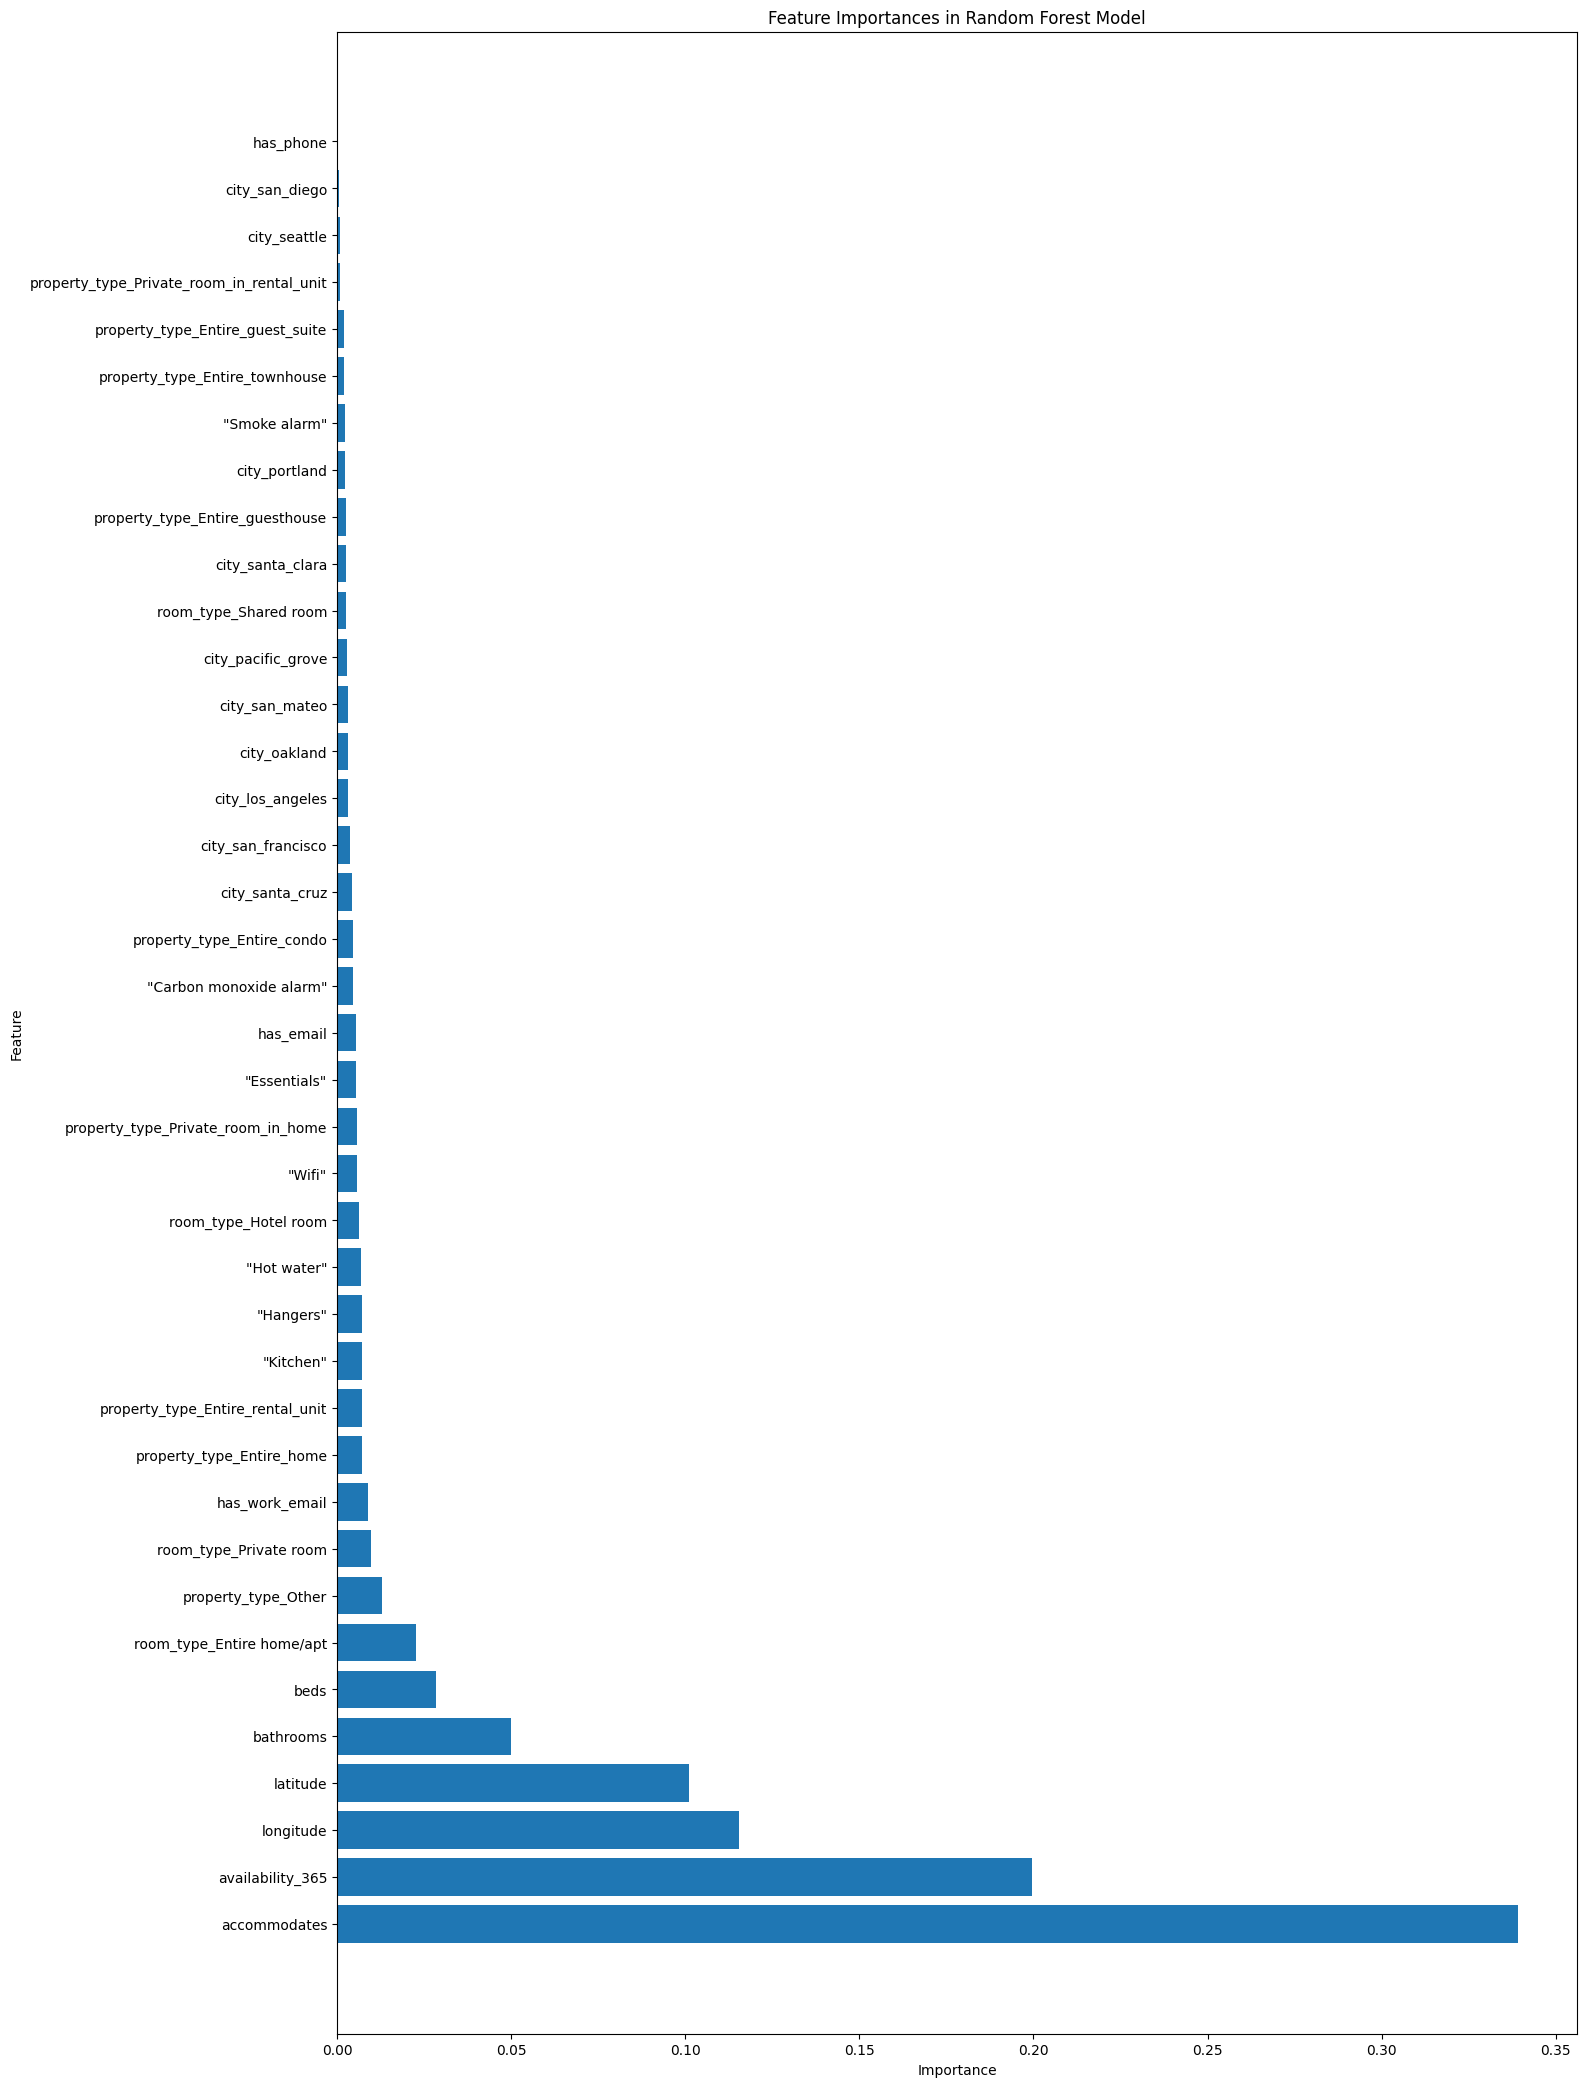

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 26))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title("Feature Importances in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [40]:
price_min = data['price_in_dollar'].min()
price_max = data['price_in_dollar'].max()

print(f"Price Range: Minimum = {price_min}, Maximum = {price_max}")


Price Range: Minimum = 10.0, Maximum = 515.0


To improve my MSE, MAE, and
R-sqaured I tried several techniques, including:




*   Hyperparameter tuning using RandomizedSearchCV


*   Adding polynomial features
*   Applying Principal Component Analysis (PCA) to capture the main variance in the data, especially to address feature redundancy or multicollinearity.


However, these methods ended up worsening the results.

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

from sklearn.model_selection import train_test_split
import numpy as np
data = pd.read_csv('/content/data_needed_for_modeling .csv')

# Select the numerical features for prediction (excluding the target)
numerical_features = [
    'latitude','longitude', 'accommodates', 'bathrooms', 'beds', 'availability_365',
    '"Smoke alarm"', '"Wifi"', '"Carbon monoxide alarm"', '"Kitchen"', '"Essentials"',
    '"Hangers"', '"Hot water"', 'has_email', 'has_phone', 'has_work_email',
    'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room',
    'room_type_Shared room', 'property_type_Entire_home', 'property_type_Entire_rental_unit',
    'property_type_Private_room_in_home', 'property_type_Entire_condo', 'property_type_Entire_guesthouse',
    'property_type_Entire_guest_suite', 'property_type_Private_room_in_rental_unit', 'property_type_Entire_townhouse',
    'property_type_Other', 'city_los_angeles', 'city_oakland', 'city_pacific_grove', 'city_portland',
    'city_san_diego', 'city_san_francisco', 'city_san_mateo', 'city_santa_clara', 'city_santa_cruz', 'city_seattle'
]
target_feature = 'price_in_dollar'

# Split data into features (X) and target (y)
X = data[numerical_features]
y = data[target_feature]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for randomized search (smaller grid)
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of trees (range from 100 to 1000)
    'max_depth': [None, 10, 20, 30, 40],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Correct choices for max_features
}

# Initialize RandomizedSearchCV with cross-validation (CV)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=3, scoring='neg_mean_squared_error',
                                   n_jobs=-1, random_state=42)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Print the best parameters
print(f"Best Parameters: {best_params}")

# Make predictions on the test data using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Best Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}
Mean Absolute Error (MAE): 46.28962983688151
Mean Squared Error (MSE): 4532.336313498059
R-squared (R²): 0.5628195905645491


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/data_needed_for_modeling .csv')

# Select the numerical features for prediction (excluding the target)
numerical_features = [
    'latitude','longitude', 'accommodates', 'bathrooms', 'beds', 'availability_365',
    '"Smoke alarm"', '"Wifi"', '"Carbon monoxide alarm"', '"Kitchen"', '"Essentials"',
    '"Hangers"', '"Hot water"', 'has_email', 'has_phone', 'has_work_email',
    'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room',
    'room_type_Shared room', 'property_type_Entire_home', 'property_type_Entire_rental_unit',
    'property_type_Private_room_in_home', 'property_type_Entire_condo', 'property_type_Entire_guesthouse',
    'property_type_Entire_guest_suite', 'property_type_Private_room_in_rental_unit', 'property_type_Entire_townhouse',
    'property_type_Other', 'city_los_angeles', 'city_oakland', 'city_pacific_grove', 'city_portland',
    'city_san_diego', 'city_san_francisco', 'city_san_mateo', 'city_santa_clara', 'city_santa_cruz', 'city_seattle'
]
target_feature = 'price_in_dollar'

# Split data into features (X) and target (y)
X = data[numerical_features]
y = data[target_feature]

# Apply StandardScaler to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Number of components selected:", pca.n_components_)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)




Explained Variance Ratio: [0.10395239 0.08557882 0.0574923  0.05572043 0.04088054 0.03674226
 0.03443031 0.0328333  0.03109934 0.03039682 0.0291044  0.02883685
 0.02760734 0.02700072 0.02677079 0.02632411 0.02594346 0.0258984
 0.02546718 0.02499981 0.02452849 0.02428758 0.02334339 0.02256176
 0.02204476 0.01924835 0.01787328 0.01670563 0.01198326]
Number of components selected: 29
Mean Absolute Error (MAE): 54.299757634481864
Mean Squared Error (MSE): 5578.343617799436
R-squared (R²): 0.46192374569861305


In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)

# Train the RandomForestRegressor on the new features
rf_model_poly = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model_poly.fit(X_poly, y_train)

# Evaluate the model
X_test_poly = poly.transform(X_test_scaled)
y_pred_poly = rf_model_poly.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Mean Absolute Error (MAE):", mae_poly)
print("Mean Squared Error (MSE):", mse_poly)
print("R-squared (R²):", r2_poly)


Mean Absolute Error (MAE): 46.66671808157988
Mean Squared Error (MSE): 4557.022293454107
R-squared (R²): 0.5604384286034741


Mean Absolute Error (MAE): 61.85512616504384
Mean Squared Error (MSE): 6265.6243817240775
R-squared (R²): 0.3956299702621243

Coefficients:
                                            Coefficient
latitude                                   -178.740700
longitude                                  -182.402359
accommodates                                 37.293397
bathrooms                                     1.930456
beds                                          2.070533
availability_365                            -17.494864
"Smoke alarm"                                 0.918005
"Wifi"                                        1.220596
"Carbon monoxide alarm"                      -0.417176
"Kitchen"                                     0.440901
"Essentials"                                  6.315784
"Hangers"                                    -1.215619
"Hot water"                                  -9.967778
has_email                                     0.064993
has_phone                         

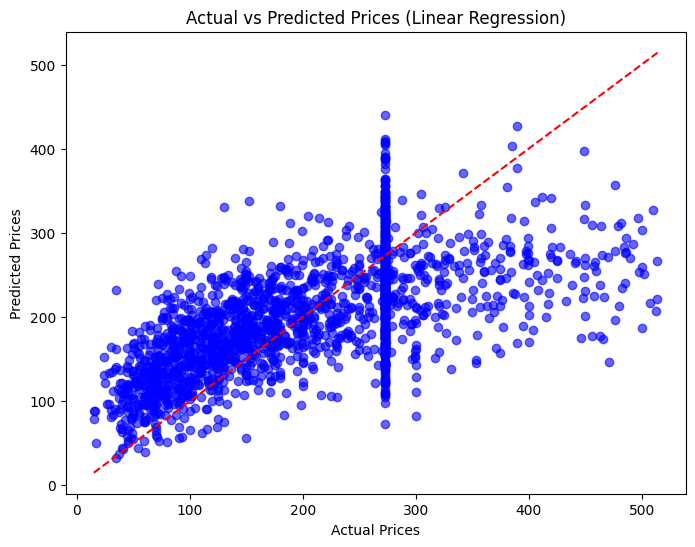

In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assume you already have X (features) and y (target), so I'm just going to split the data.

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (since Linear Regression can be sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Optionally, you can also check the coefficients of the linear regression model
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients:\n", coefficients)

# Optionally: Plot the actual vs predicted prices (to visually check the model's performance)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()
